# DAP Project - 네트워크 이상 탐지

***

## 개요
>    Classification을 통한 네트워크 이상 탐지
>    ㅁㅁ
>    ㅁㅁㅁ

    


## 관련 라이브러리 

In [1]:

# 패키지 import

import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

## 1. 데이터세트

In [2]:
# 데이터 가져오기

data = pd.read_csv('https://raw.githubusercontent.com/leebs0521/DAP/main/Dataset/ades-2021/dev.csv')
nRow, nCol = data.shape
print("Data has {} rows & {} columns".format(nRow, nCol))
data.head()

Data has 345815 rows & 42 columns


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,udp,private,SF,105,147,0,0,0,0,...,56,0.60,0.03,0.01,0.00,0.0,0.0,0.0,0.00,0
1,4,udp,private,SF,105,147,0,0,0,0,...,250,0.98,0.01,0.01,0.00,0.0,0.0,0.0,0.00,0
2,0,tcp,http,REJ,0,0,0,0,0,0,...,255,1.00,0.00,0.08,0.24,0.0,0.0,1.0,0.99,0
3,0,tcp,http,SF,310,2268,0,0,0,0,...,255,1.00,0.00,0.05,0.04,0.0,0.0,0.0,0.00,0
4,0,udp,domain_u,SF,46,46,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345815 entries, 0 to 345814
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     345815 non-null  int64  
 1   protocol_type                345815 non-null  object 
 2   service                      345815 non-null  object 
 3   flag                         345815 non-null  object 
 4   src_bytes                    345815 non-null  int64  
 5   dst_bytes                    345815 non-null  int64  
 6   land                         345815 non-null  int64  
 7   wrong_fragment               345815 non-null  int64  
 8   urgent                       345815 non-null  int64  
 9   hot                          345815 non-null  int64  
 10  num_failed_logins            345815 non-null  int64  
 11  logged_in                    345815 non-null  int64  
 12  num_compromised              345815 non-null  int64  
 13 

In [4]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,345815.000000,3.458150e+05,3.458150e+05,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000,...,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000,345815.000000
mean,47.629866,1.652131e+03,8.780215e+02,0.000046,0.006278,0.000014,0.034863,0.000159,0.148238,0.009881,...,188.719954,0.754079,0.031016,0.602577,0.006650,0.176193,0.175861,0.058245,0.057501,0.803088
std,693.577062,5.905801e+04,3.331798e+04,0.006802,0.133003,0.006131,0.786947,0.016919,0.355336,1.534885,...,106.003839,0.410574,0.109775,0.481140,0.041933,0.380109,0.380426,0.230823,0.230283,0.397666
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,47.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,42088.000000,5.135678e+06,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,767.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. 데이터 전처리
### 1. missing values handling
>#### 해당 데이터 세트는 결측값이 존재하지 않는다.

In [5]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

### 2. 단일값을 가지는 행 제거
>#### 단일 값 및 거의 단일 값인 행을 제거
    * 총 데이터 수 = 345815 이므로 34500이상 부터 단일 값으로 간주

In [6]:
# 단일 값만 가지는 행 찾기

drop_list = []
for col in data.columns:
    temp = data[col].value_counts()[0]
    if temp > 345500 :
        #print(data[col].value_counts())
        drop_list.append(col)
        
print(drop_list)

['land', 'urgent', 'num_failed_logins', 'root_shell', 'su_attempted', 'num_file_creations', 'num_shells', 'num_outbound_cmds', 'is_host_login']


In [7]:
# 단일 값 행 제거

data.drop(drop_list, axis=1, inplace = True)
print(data.shape)

(345815, 33)


### 3. 데이터 인코딩 & 데이터 정규화
> #### object -> label encoding

In [41]:
# data -> x, y

X = data.drop("class", axis = 1);
Y = data["class"]
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,udp,private,SF,105,147,0,0,0,0,...,94,56,0.60,0.03,0.01,0.00,0.0,0.0,0.0,0.00
1,4,udp,private,SF,105,147,0,0,0,0,...,255,250,0.98,0.01,0.01,0.00,0.0,0.0,0.0,0.00
2,0,tcp,http,REJ,0,0,0,0,0,0,...,13,255,1.00,0.00,0.08,0.24,0.0,0.0,1.0,0.99
3,0,tcp,http,SF,310,2268,0,0,1,0,...,22,255,1.00,0.00,0.05,0.04,0.0,0.0,0.0,0.00
4,0,udp,domain_u,SF,46,46,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00


In [9]:
# Custom Label Encoder for handling unknown values
class LabelEncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()

    def fit(self, data):
        self.label_encoder = self.label_encoder.fit(list(data) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self

    def transform(self, data):
        new_data = list(data)
        for unique_item in np.unique(data):
            if unique_item not in self.label_encoder.classes_:
                new_data = ['Unknown' if x==unique_item else x for x in new_data]
        return self.label_encoder.transform(new_data)

In [10]:
le = LabelEncoderExt()

# encode the selected columns
for col in X.select_dtypes("object"):
  le.fit(X[col])
  X[col] = le.transform(X[col])

In [11]:
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,3,46,9,105,147,0,0,0,0,...,94,56,0.60,0.03,0.01,0.00,0.0,0.0,0.0,0.00
1,4,3,46,9,105,147,0,0,0,0,...,255,250,0.98,0.01,0.01,0.00,0.0,0.0,0.0,0.00
2,0,2,23,1,0,0,0,0,0,0,...,13,255,1.00,0.00,0.08,0.24,0.0,0.0,1.0,0.99
3,0,2,23,9,310,2268,0,0,1,0,...,22,255,1.00,0.00,0.05,0.04,0.0,0.0,0.0,0.00
4,0,3,12,9,46,46,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# store the columns
cols = X.columns

# transform the data
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = cols)
X_scaled.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.068673,2.663283,1.596894,0.513572,-0.026197,-0.021941,-0.047201,-0.044301,-0.417178,-0.006438,...,-2.137914,-1.252032,-0.375277,-0.009251,-1.231611,-0.158594,-0.463534,-0.462275,-0.252338,-0.249695
1,-0.062906,2.663283,1.596894,0.513572,-0.026197,-0.021941,-0.047201,-0.044301,-0.417178,-0.006438,...,0.348246,0.578094,0.550258,-0.191443,-1.231611,-0.158594,-0.463534,-0.462275,-0.252338,-0.249695
2,-0.068673,0.926252,-0.102775,-3.040241,-0.027975,-0.026353,-0.047201,-0.044301,-0.417178,-0.006438,...,-3.388716,0.625262,0.598970,-0.282539,-1.086123,5.564812,-0.463534,-0.462275,4.079990,4.049368
3,-0.068673,0.926252,-0.102775,0.513572,-0.022726,0.041719,-0.047201,-0.044301,2.397060,-0.006438,...,-3.249738,0.625262,0.598970,-0.282539,-1.148475,0.795307,-0.463534,-0.462275,-0.252338,-0.249695
4,-0.068673,2.663283,-0.915660,0.513572,-0.027196,-0.024972,-0.047201,-0.044301,-0.417178,-0.006438,...,0.348246,0.625262,0.598970,-0.282539,-1.252395,-0.158594,-0.463534,-0.462275,-0.252338,-0.249695


### 4. Feature Selection

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

rfc.fit(X_train, y_train)

feature_imp = pd.DataFrame({'feature':X_train.columns,'importance':rfc.feature_importances_})
feature_imp = feature_imp.sort_values('importance',ascending=False).set_index('feature')

In [15]:
print(feature_imp)

                             importance
feature                                
count                          0.202322
dst_bytes                      0.181772
logged_in                      0.084487
dst_host_count                 0.071054
protocol_type                  0.068581
srv_count                      0.048163
src_bytes                      0.047855
same_srv_rate                  0.037562
dst_host_srv_diff_host_rate    0.036086
dst_host_same_src_port_rate    0.028178
service                        0.028090
diff_srv_rate                  0.023953
srv_diff_host_rate             0.023012
dst_host_srv_count             0.020252
dst_host_serror_rate           0.012866
flag                           0.012760
dst_host_diff_srv_rate         0.010840
hot                            0.010067
dst_host_same_srv_rate         0.010034
serror_rate                    0.008878
dst_host_srv_serror_rate       0.007013
num_compromised                0.006248
dst_host_rerror_rate           0.005170


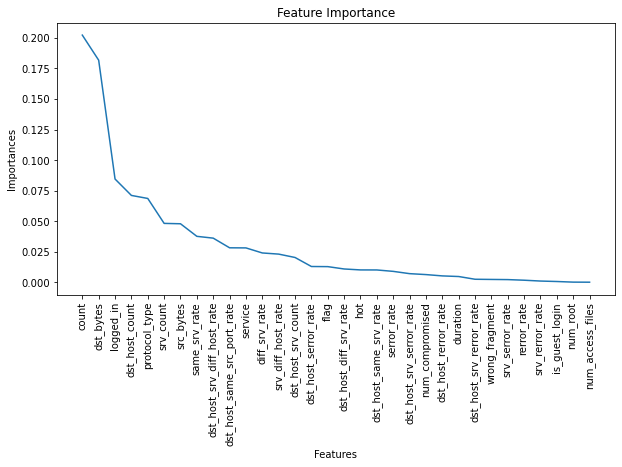

In [16]:
# plot feat_imp
plt.figure(figsize = (10, 5))
plt.title("Feature Importance")
plt.ylabel("Importances")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.plot(feature_imp)

In [17]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 15 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'hot',
 'logged_in',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate']

In [18]:
X_select = X_scaled[selected_features]

X_select.head()

,protocol_type,service,flag,src_bytes,dst_bytes,hot,logged_in,count,srv_count,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,2.663283,1.596894,0.513572,-0.026197,-0.021941,-0.044301,-0.417178,-1.554799,-1.186143,0.536333,-0.254881,-0.203321,-2.137914,-1.231611,-0.158594
1,2.663283,1.596894,0.513572,-0.026197,-0.021941,-0.044301,-0.417178,-1.550108,-1.182083,0.536333,-0.254881,-0.203321,0.348246,-1.231611,-0.158594
2,0.926252,-0.102775,-3.040241,-0.027975,-0.026353,-0.044301,-0.417178,-1.554799,-1.186143,0.536333,-0.254881,-0.203321,-3.388716,-1.086123,5.564812
3,0.926252,-0.102775,0.513572,-0.022726,0.041719,-0.044301,2.397060,-1.531343,-1.165842,0.536333,-0.254881,-0.203321,-3.249738,-1.148475,0.795307
4,2.663283,-0.915660,0.513572,-0.027196,-0.024972,-0.044301,-0.417178,-1.306164,-0.970952,0.536333,-0.254881,-0.203321,0.348246,-1.252395,-0.158594


## 3. Visualiztaion 

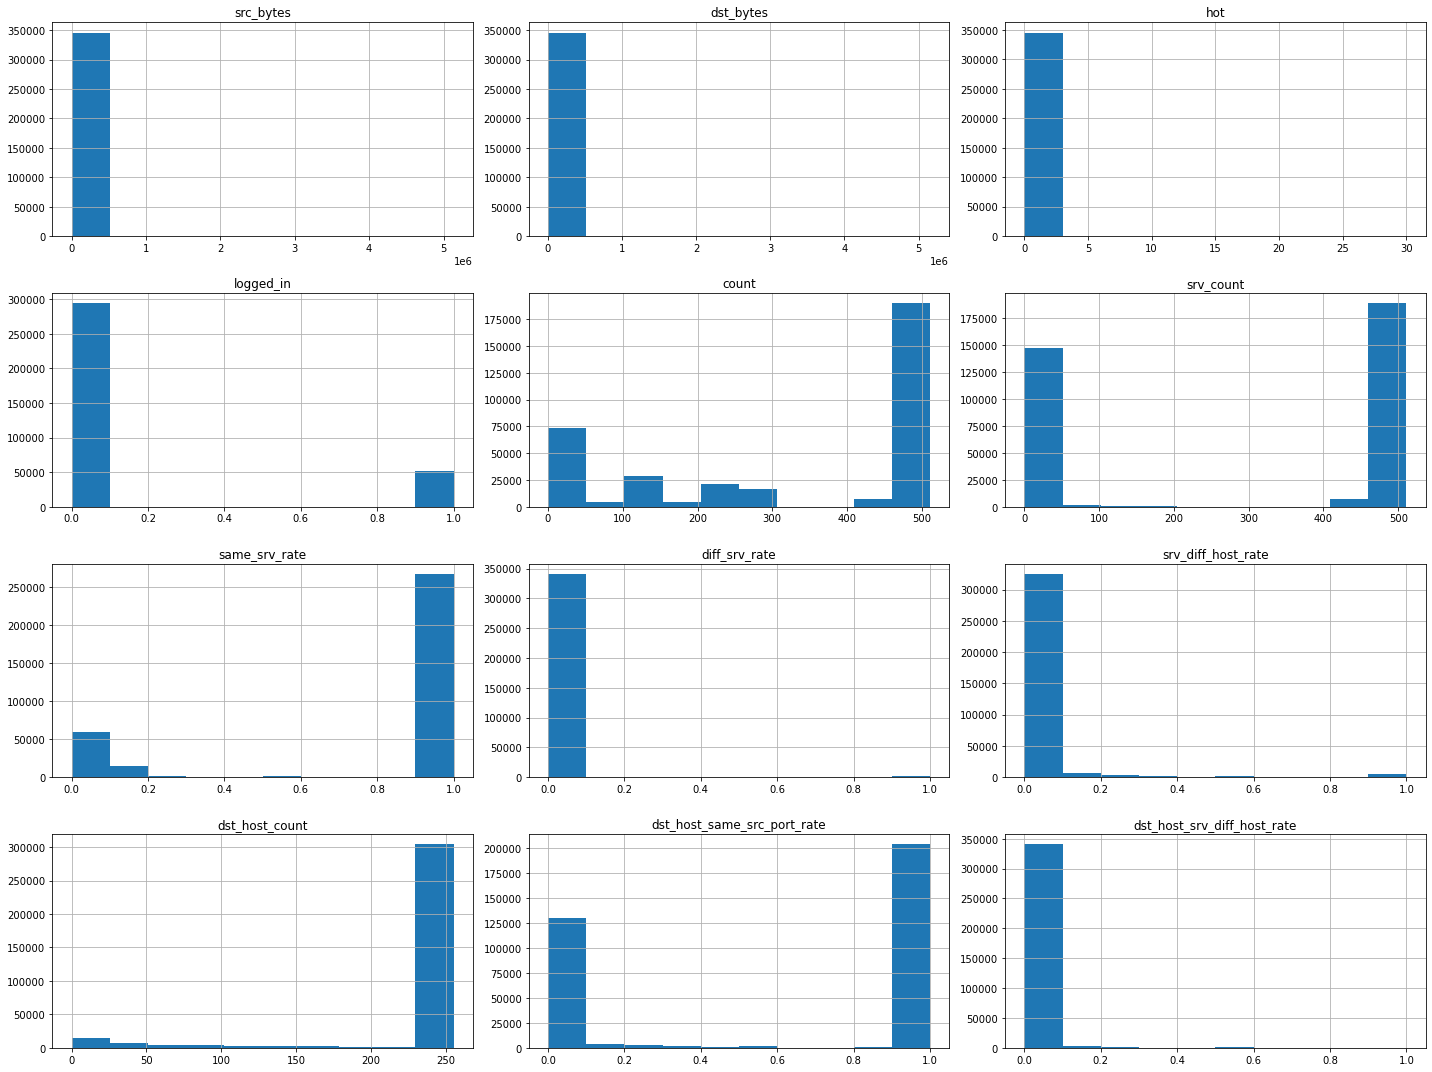

In [54]:
# a histogram plot for each numerical attribute
data[selected_features].hist(bins=10, figsize=(20,15))
plt.tight_layout()
plt.show()

## 4. Classification

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_select, Y, test_size=0.3, random_state=42)

In [30]:
X_train

,protocol_type,service,flag,src_bytes,dst_bytes,hot,logged_in,count,srv_count,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
214353,0.926252,1.596894,-1.263334,-0.027975,-0.026353,-0.044301,-0.417178,-0.260017,-1.186143,-2.041129,0.474643,-0.203321,0.348246,-1.252395,-0.158594
98518,-0.810778,-0.693964,0.513572,-0.010500,-0.026353,-0.044301,-0.417178,0.837732,0.884561,0.536333,-0.254881,-0.203321,0.348246,0.826004,-0.158594
182931,0.926252,1.596894,-1.263334,-0.027975,-0.026353,-0.044301,-0.417178,-0.184958,-1.108999,-1.860707,0.353056,-0.203321,0.348246,-1.252395,-0.158594
210378,0.926252,1.596894,-1.263334,-0.027975,-0.026353,-0.044301,-0.417178,-0.241252,-1.137421,-1.912256,0.474643,-0.203321,0.348246,-1.252395,-0.158594
159878,-0.810778,-0.693964,0.513572,-0.010500,-0.026353,-0.044301,-0.417178,0.833041,0.880500,0.536333,-0.254881,-0.203321,0.348246,0.826004,-0.158594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,-0.810778,-0.693964,0.513572,-0.019170,-0.026353,-0.044301,-0.417178,0.837732,0.884561,0.536333,-0.254881,-0.203321,0.348246,0.826004,-0.158594
259178,-0.810778,-0.693964,0.513572,-0.010500,-0.026353,-0.044301,-0.417178,0.837732,0.884561,0.536333,-0.254881,-0.203321,0.348246,0.826004,-0.158594
131932,0.926252,1.596894,-1.263334,-0.027975,-0.026353,-0.044301,-0.417178,-0.907408,-1.137421,-1.809157,0.474643,-0.203321,0.348246,-1.252395,-0.158594
146867,-0.810778,-0.693964,0.513572,-0.019170,-0.026353,-0.044301,-0.417178,0.837732,0.884561,0.536333,-0.254881,-0.203321,0.348246,0.826004,-0.158594


### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='lbfgs', max_iter=400)

# fit the model with data
logreg.fit(X_train, y_train)

# Forecast the target variable for given test dataset
predictions = logreg.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))

[[20261   210]
 [  983 82291]]


In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     20471
           1       1.00      0.99      0.99     83274

    accuracy                           0.99    103745
   macro avg       0.98      0.99      0.98    103745
weighted avg       0.99      0.99      0.99    103745



### kNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors = 3)

# Train the model using the training dataset
knn.fit(X_train, y_train)

# Predict the target variable for test dataset
predictions = knn.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))

[[20429    42]
 [   52 83222]]


In [28]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20471
           1       1.00      1.00      1.00     83274

    accuracy                           1.00    103745
   macro avg       1.00      1.00      1.00    103745
weighted avg       1.00      1.00      1.00    103745



### Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian classifier object
model = GaussianNB()

# Train the model using the training dataset
model.fit(X_train, y_train)

# Predict the target variable for test dataset
predictions = model.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))

[[20032   439]
 [ 1306 81968]]


In [33]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     20471
           1       0.99      0.98      0.99     83274

    accuracy                           0.98    103745
   macro avg       0.97      0.98      0.97    103745
weighted avg       0.98      0.98      0.98    103745



### SVM

In [34]:
from sklearn.svm import SVC

# Create a Gaussian classifier object
model = SVC(gamma='auto')

# Train the model using the training dataset
model.fit(X_train, y_train)

# Predict the target variable for test dataset
predictions = model.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))

[[20422    49]
 [  137 83137]]


In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     20471
           1       1.00      1.00      1.00     83274

    accuracy                           1.00    103745
   macro avg       1.00      1.00      1.00    103745
weighted avg       1.00      1.00      1.00    103745

